<a href="https://colab.research.google.com/github/Cristopxer/AI_software_specialist_assessment/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4
A grocery store wants to know its customers better in order to create personalized marketing
campaigns. You are asked to develop a classification model using Keras that takes into account
customers' shopping frequency, their spending habits and the maximum amount they spend in the
store. The goal of the model is to classify customers into three categories: low, medium and high
value.

dataset: [data_costumer_classification.csv](https://raw.githubusercontent.com/Cristopxer/AI_software_specialist_assessment/d711553d9a0eba0a5495f9061496810c6422f553/data_customer_classification.csv)

## Setup enviroment and import packages

In [1]:
# # Install packages needed
# !pip install tensorflow

In [2]:
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files

## Data Exploration and Cleanesse

In [3]:
# Get data
url = "https://raw.githubusercontent.com/Cristopxer/AI_software_specialist_assessment/d711553d9a0eba0a5495f9061496810c6422f553/data_customer_classification.csv"
df = pd.read_csv(url)
df.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [4]:
# Check if there are null values
df.isnull().sum()

customer_id    0
trans_date     0
tran_amount    0
dtype: int64

In [5]:
df.describe()

,tran_amount
count,125000.000000
mean,64.991912
std,22.860006
min,10.000000
25%,47.000000
50%,65.000000
75%,83.000000
max,105.000000


In [6]:
#Check for outliers
fig = px.box(df, y='tran_amount', width=400, height=400)
fig.show()

In [7]:
# format dates
df["trans_date"] = pd.to_datetime(df["trans_date"], format="%d-%b-%y")
df["weekday"] = df["trans_date"].dt.day_of_week
df["month"] = df["trans_date"].dt.month
df["year"] = df["trans_date"].dt.year
df.head()

,customer_id,trans_date,tran_amount,weekday,month,year
0,CS5295,2013-02-11,35,0,2,2013
1,CS4768,2015-03-15,39,6,3,2015
2,CS2122,2013-02-26,52,1,2,2013
3,CS1217,2011-11-16,99,2,11,2011
4,CS1850,2013-11-20,78,2,11,2013


## Get purchase insights

In [8]:
# sum tran_amount by day of the week
df_weekday = df.groupby("weekday").sum('tran_amount')
df_weekday = df_weekday.reset_index()

In [9]:
# Plot transactions by weekday
max_amount_display = df_weekday['tran_amount'].max() + 10000
fig = px.bar(df_weekday, x="weekday", y="tran_amount", title = "Transactions by day of the week")
fig.update_layout(yaxis_range=[1000000, max_amount_display])
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1, 2, 3, 4, 5, 6],
        ticktext = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    )
)
fig.show()

In [10]:
# sum tran_amount by month
df_monthly = df[["month","tran_amount"]].groupby("month").sum("tran_amount")
df_monthly = df_monthly.reset_index()

# Plot transactions by Month
fig = px.bar(df_monthly, x="month", y="tran_amount", title = "Amount of transactions by month")
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    )
)
fig.show()

In [11]:
# sum tran_amount by month
df_yearly = df[["year","tran_amount"]].groupby("year").sum("tran_amount")
df_yearly = df_yearly.reset_index()

# Plot transactions by Month
fig = px.bar(df_yearly, x="year", y="tran_amount", title = "Amount of transactions by Year")
fig.show()

## Customer Segmentation
As the data provided does not have label which is essential for a classification model which is supervised learning, so was decide to follow unsupervised learning using k-means clustering to provide with a label to the dataset.

In [12]:
# Group customers by id, get shopping frequency and Max transaction amount
df1 = df.groupby("customer_id").agg(shopping_freq=('customer_id', 'count'), max_amount=('tran_amount', 'max')).reset_index()
df1.head()

,customer_id,shopping_freq,max_amount
0,CS1112,15,105
1,CS1113,20,98
2,CS1114,19,105
3,CS1115,22,104
4,CS1116,13,105


In [13]:
# Plot data
fig = px.scatter(df1[["shopping_freq", "max_amount"]], x="shopping_freq", y="max_amount")
fig.show()

In [14]:
errors = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, n_init="auto")
    kmeans.fit(df1[["shopping_freq", "max_amount"]])
    errors.append(kmeans.inertia_)

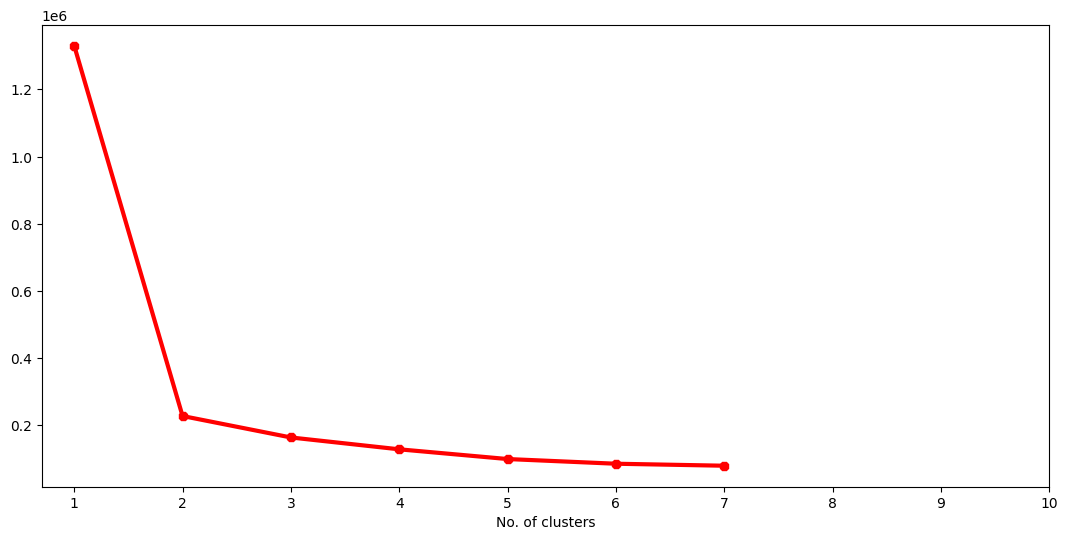

In [15]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,8), errors)
plt.plot(range(1,8), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.xticks(np.arange(1,11,1))
plt.show()

The optimal number of clusters is **2**

### Customer Segmentation K-Means (Optimal number of cluters 2)

In [16]:
km = KMeans(n_clusters=2, n_init = "auto")
km.fit(df1[["shopping_freq", "max_amount"]])
y = km.predict(df1[["shopping_freq", "max_amount"]])
df1['label'] = y
df1.sample(10)

,customer_id,shopping_freq,max_amount,label
1258,CS2370,21,98,1
679,CS1791,21,99,1
5793,CS7905,20,76,0
82,CS1194,22,103,1
6434,CS8546,14,79,0
6653,CS8765,13,78,0
1382,CS2494,21,103,1
753,CS1865,31,102,1
3229,CS4341,26,104,1
2617,CS3729,22,102,1


In [17]:
# Plotting results
fig = px.scatter(df1, x="shopping_freq", y="max_amount", color="label", color_continuous_scale="portland", title="Customer Segmentation optimal number of clusters (2)")
fig.show()

### Customer Segmentation K-Means (Required number of cluters 3) (low, med, high)

In [18]:
km = KMeans(n_clusters=3, n_init = "auto")
km.fit(df1[["shopping_freq", "max_amount"]])
y = km.predict(df1[["shopping_freq", "max_amount"]])
df1['label'] = y
df1.sample(10)

,customer_id,shopping_freq,max_amount,label
3276,CS4388,19,105,0
5134,CS7246,8,72,1
174,CS1286,21,105,2
4550,CS5662,22,101,2
2400,CS3512,16,103,0
1140,CS2252,31,100,2
5820,CS7932,15,74,1
1625,CS2737,20,103,2
6338,CS8450,11,76,1
2141,CS3253,19,105,0


In [19]:
# Plotting results
fig = px.scatter(df1, x="shopping_freq", y="max_amount", color="label", color_continuous_scale="portland", title="Customer Segmentation required number of clusters (3)")
fig.show()

In [20]:
labels = ["Low", "Medium", "High"]
df1['label'] = [labels[x] for x in df1['label']]
df1.rename(columns={"label" : "customer_category"}, inplace=True)
df1.sample(10)

,customer_id,shopping_freq,max_amount,customer_category
2392,CS3504,30,102,High
904,CS2016,21,101,High
6830,CS8942,13,73,Medium
6516,CS8628,14,74,Medium
546,CS1658,20,102,Low
6714,CS8826,13,70,Medium
2348,CS3460,19,105,Low
741,CS1853,17,104,Low
3191,CS4303,31,105,High
4580,CS5692,16,105,Low


In [21]:
df1.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>